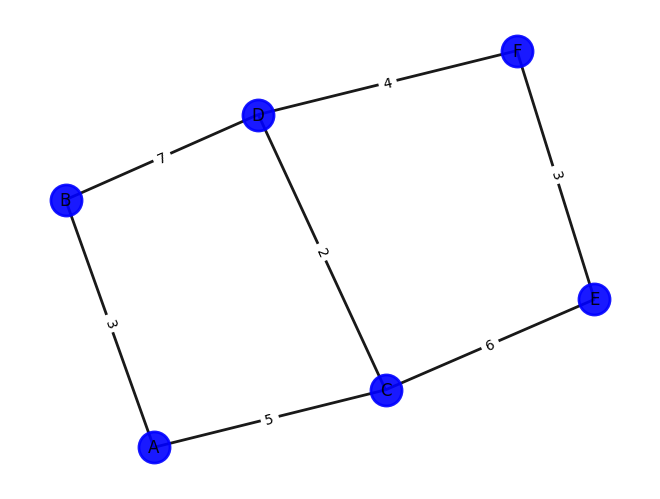

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt  # Pastikan untuk mengimpor matplotlib

class GraphVisualisasi:
    def __init__(self, graph_data):
        self.G = nx.Graph()
        self.graph_data = graph_data

    def add_edges(self):
        for node, connections in self.graph_data.items():
            for edge in connections:
                self.G.add_edge(node, edge['v'], weight=edge['w'])

    def visualize(self):
        pos = nx.spring_layout(self.G)
        weights = nx.get_edge_attributes(self.G, "weight")

        plt.figure()
        nx.draw(
            self.G, pos, edge_color='black', width=2, linewidths=2,
            node_size=500, node_color='blue', alpha=0.9,
            labels={node: node for node in self.G.nodes()}
        )
        nx.draw_networkx_edge_labels(self.G, pos, edge_labels=weights)
        plt.axis('off')
        plt.show()

    def graph_visualization(self):
        self.add_edges()
        self.visualize()

# Define a different graph data
graph_data = {
    'A': [{'v': 'B', 'w': 3}, {'v': 'C', 'w': 5}],
    'B': [{'v': 'A', 'w': 3}, {'v': 'D', 'w': 7}],
    'C': [{'v': 'A', 'w': 5}, {'v': 'D', 'w': 2}, {'v': 'E', 'w': 6}],
    'D': [{'v': 'B', 'w': 7}, {'v': 'C', 'w': 2}, {'v': 'F', 'w': 4}],
    'E': [{'v': 'C', 'w': 6}, {'v': 'F', 'w': 3}],
    'F': [{'v': 'D', 'w': 4}, {'v': 'E', 'w': 3}],
}

# Visualize the graph
C_Dijkstra_shortest_path_2 = GraphVisualisasi(graph_data=graph_data)
C_Dijkstra_shortest_path_2.graph_visualization()


In [ ]:
# Define a different graph data
new_graph_data = {
    'A': [{'v': 'B', 'w': 3}, {'v': 'C', 'w': 5}],
    'B': [{'v': 'A', 'w': 3}, {'v': 'D', 'w': 7}],
    'C': [{'v': 'A', 'w': 5}, {'v': 'D', 'w': 2}, {'v': 'E', 'w': 6}],
    'D': [{'v': 'B', 'w': 7}, {'v': 'C', 'w': 2}, {'v': 'F', 'w': 4}],
    'E': [{'v': 'C', 'w': 6}, {'v': 'F', 'w': 3}],
    'F': [{'v': 'D', 'w': 4}, {'v': 'E', 'w': 3}],
}

def get_path_weight(path):
    path_weight = 0
    for index, value in enumerate(path):
        try:
            for j in new_graph_data[value]:
                if j['v'] == path[index + 1]:
                    path_weight += j['w']
        except IndexError:
            break
    return path_weight


def find_shortest_path(graph_data, start, end, path=[]):
    path = path + [start]
    shortest = None
    weights = None

    if start == end:
        return path

    for node in graph_data[start]:
        if node['v'] not in path:
            new_path = find_shortest_path(graph_data, node['v'], end, path)
            if new_path:
                new_weight = get_path_weight(new_path)
                if not weights or new_weight < weights:
                    shortest = new_path
                    weights = new_weight
    return shortest

shortest_path = find_shortest_path(new_graph_data, 'A', 'F')
path_length = get_path_weight(shortest_path)

print('Shortest Path:', shortest_path)
print('Path Length:', path_length)


Shortest Path: ['A', 'C', 'D', 'F']
Path Length: 11
